### Chapter 3.1 프로야구 선수의 내년 연봉 예측하기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
picher = pd.read_csv('data/picher_stats_2017.csv')
batter = pd.read_csv('data/batter_stats_2017.csv')

In [3]:
print(picher.shape)
print(picher.columns)
picher.head()

(152, 22)
Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [4]:
print(batter.shape)
print(batter.columns)
batter.head()

(191, 21)
Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')


,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [5]:
## 연봉(2018)을 예측하기 위해 (Regression)
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [6]:
## 한글폰트 지정
mpl.rc('font', family='Malgun Gothic')

<AxesSubplot:>

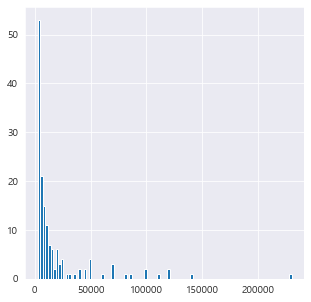

In [7]:
plt.figure(figsize=(5,5))
picher['연봉(2018)'].hist(bins = 100)

<AxesSubplot:>

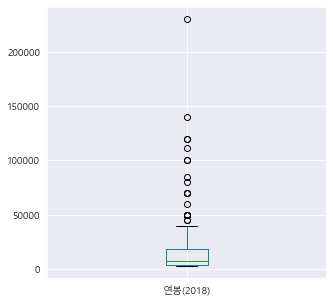

In [8]:
plt.figure(figsize=(5,5))
picher.boxplot(column = ['연봉(2018)'])

<AxesSubplot:ylabel='연봉(2018)'>

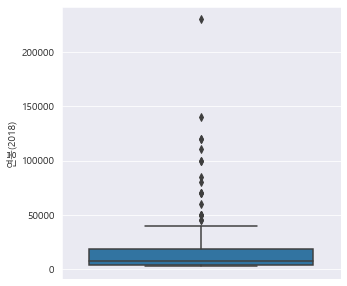

In [9]:
## 다른방법 
plt.figure(figsize=(5,5))
sns.boxplot(data = picher, y = '연봉(2018)')

In [10]:
## 모든 변수 분포 살펴보기 
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9', 
                             '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

In [11]:
## 각 컬럼에 대한 히스토그램을 출력 
def plot_hist_each_columns(df) : 
    plt.rcParams['figure.figsize'] = [18, 18]
    fig = plt.figure(1)
    
    ## df 열의 갯수만큼 subplot 생성 
    for i in range(len(df.columns)) : 
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

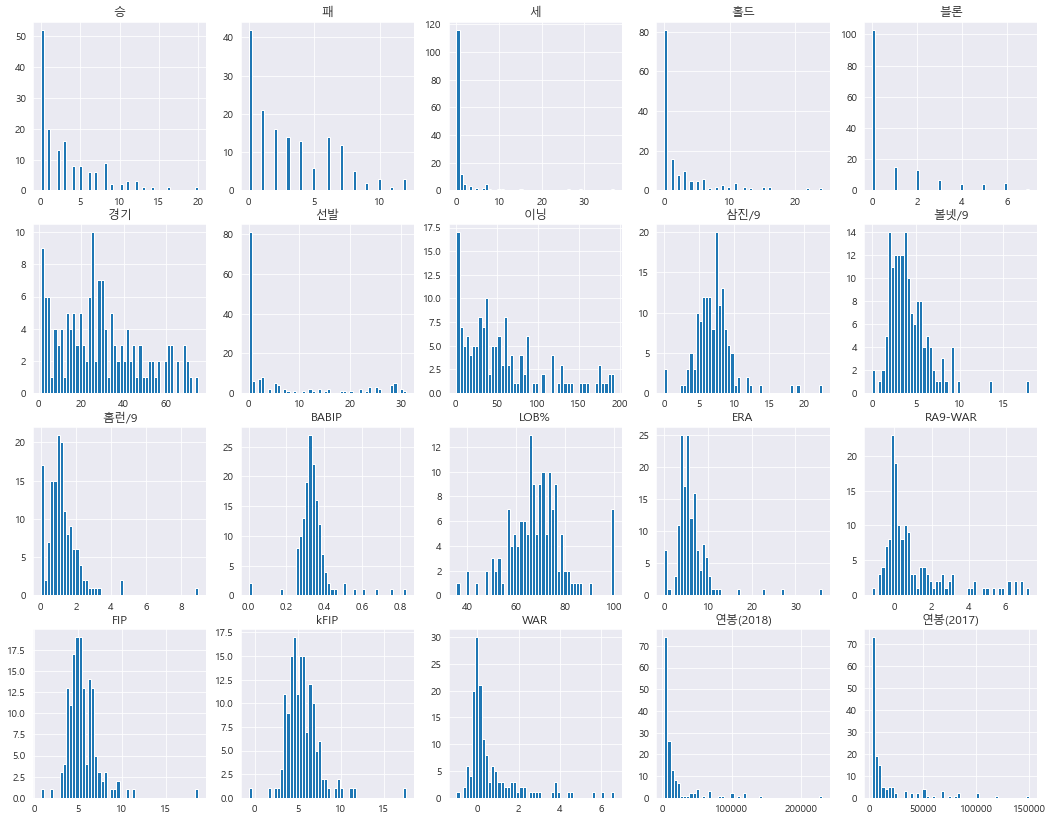

In [12]:
plot_hist_each_columns(picher_features_df)

In [13]:
## scale이 제각각 --> 표준화 
def standard_scale(df, scale_columns): 
    for col in scale_columns : 
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x - series_mean / series_std))
    return df

In [14]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9','볼넷/9', 
                 '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

picher_df = standard_scale(picher, scale_columns) 
picher_df = picher_df.rename(columns = {'연봉(2018)':'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,15.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,188.867661,...,-0.429625,-3.484542,67.788557,2.14894,6.336749,0.746812,0.6459,6.116356,140000,84999.341015
1,소사,LG,10.172446,9.991387,0.693548,-0.585705,-0.543592,28.510767,28.375175,183.967661,...,-0.659625,-3.507542,61.188557,2.42894,6.226749,0.576812,0.6159,5.576356,120000,49999.341015
2,양현종,KIA,19.172446,4.991387,-0.306452,-0.585705,-0.543592,29.510767,30.375175,191.967661,...,-0.399625,-3.494542,66.188557,1.98894,5.966749,0.996812,1.0259,5.136356,230000,149999.341015
3,차우찬,LG,9.172446,5.991387,-0.306452,-0.585705,-0.543592,26.510767,27.375175,174.067661,...,-0.169625,-3.528542,69.088557,1.97894,5.536749,1.256812,1.2359,4.126356,100000,99999.341015
4,레일리,롯데,12.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,185.967661,...,-0.279625,-3.503542,68.188557,2.34894,5.556749,1.416812,1.5159,3.876356,111000,84999.341015


In [15]:
## category 변수들은 one-hot coding을 적용한다 : get_dummies()
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher_df.join(team_encoding)

picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,15.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,188.867661,6.456817,...,84999.341015,0,0,0,0,1,0,0,0,0
1,소사,10.172446,9.991387,0.693548,-0.585705,-0.543592,28.510767,28.375175,183.967661,4.936817,...,49999.341015,0,0,1,0,0,0,0,0,0
2,양현종,19.172446,4.991387,-0.306452,-0.585705,-0.543592,29.510767,30.375175,191.967661,4.866817,...,149999.341015,1,0,0,0,0,0,0,0,0
3,차우찬,9.172446,5.991387,-0.306452,-0.585705,-0.543592,26.510767,27.375175,174.067661,5.546817,...,99999.341015,0,0,1,0,0,0,0,0,0
4,레일리,12.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,185.967661,4.996817,...,84999.341015,0,0,0,0,0,0,1,0,0


In [16]:
## split the dataset : training, test 
from sklearn import linear_model 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [17]:
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [18]:
## model training 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_)  ## 회귀계수 출력 

[-1.66433649e+04 -1.00005486e+02 -5.03120671e+04 -1.56086205e+03
  1.57200472e+03 -7.47049524e+02 -1.18666920e+02 -5.23546876e+02
  2.14736071e+03  8.98376390e+02  7.76920737e+03  3.91969663e+04
 -1.25668595e+02 -8.92118013e+02  4.49911172e+02  3.22164149e+03
  7.77935715e+02 -2.81055645e+03  1.90870829e+03 -4.92026373e+02
 -5.21324705e+01  6.10889234e+01  7.63803603e-01  1.69794484e+01
  4.15729514e+02  3.61384063e+03 -2.07081858e+02  1.78400390e+04]


In [19]:
## statsmodels OLS를 사용하면 좀더 자세한 회귀분석 결과를 얻을 수 있다. 
import statsmodels.api as sm 

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           7.70e-42
Time:                        00:41:19   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.365e+04   4.89e+04     -0.688      0.493   -1.31e+05    6.34e+04
BABIP      -1.664e+04   1.45e+04     -1.145      0.255   -4.55e+04    1.22e+04
ERA         -100.0055    557.379     -0.179      0.858   -1206.850    1006.839
FIP        -5.031e+04   5.04e+04     -0.998      0.321    -1.5e+05    4.98e+04
KIA        -5299.6626   5674.262     -0.934      0.353   -1.66e+04    5968.298
KT         -2166.7958   5714.434     -0.379      0.705   -1.35e+04    9180.938
LG         -4485.8500   5822.759     -0.770      0.443    -1.6e+04    7076.995
LOB%        -118.6669    134.995     -0.879      0.382    -386.740     149.406
NC         -4262.3474   6364.840     -0.670      0.505   -1.69e+04    8376.963
RA9-WAR     2147.3607   1589.996      1.351      0.180   -1010.055    5304.777
SK         -2840.4241   5762.549     -0.493      0.623   -1.43e+04    8602.856
WAR         7769.2074   1915.216      4.057      0.000    3965.967    1.16e+04
kFIP         3.92e+04   4.01e+04      0.977      0.331   -4.05e+04    1.19e+05
경기          -125.6686    152.468     -0.824      0.412    -428.439     177.102
두산         -4630.9185   6208.998     -0.746      0.458    -1.7e+04    7698.921
롯데         -3288.8893   6213.150     -0.529      0.598   -1.56e+04    9049.194
볼넷/9        3221.6415   2655.869      1.213      0.228   -2052.388    8495.671
블론           777.9357    760.237      1.023      0.309    -731.745    2287.616
삼성         -6549.3570   5907.837     -1.109      0.270   -1.83e+04    5182.437
삼진/9        1908.7083   2576.865      0.741      0.461   -3208.435    7025.852
선발          -492.0264    563.005     -0.874      0.384   -1610.043     625.990
세            -52.1325    269.373     -0.194      0.847    -587.054     482.789
승             61.0889    573.363      0.107      0.915   -1077.496    1199.673
연봉(2017)       0.7638      0.051     15.055      0.000       0.663       0.865
이닝            16.9794    131.695      0.129      0.898    -244.540     278.499
패            415.7295    618.326      0.672      0.503    -812.143    1643.602
한화          -124.9599   5698.286     -0.022      0.983   -1.14e+04    1.12e+04
홀드          -207.0819    362.736     -0.571      0.569    -927.403     513.239
홈런/9        1.784e+04   1.65e+04      1.082      0.282   -1.49e+04    5.06e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     2.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [20]:
## 회귀계수 시각화 
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)
x_labels = model.params.index.tolist()

print(coefs_series)
print('--------------------------------------------------------')
print(x_labels)

0    -33649.204527
1    -16643.364914
2      -100.005486
3    -50312.067093
4     -5299.662555
5     -2166.795781
6     -4485.850027
7      -118.666920
8     -4262.347378
9      2147.360708
10    -2840.424113
11     7769.207365
12    39196.966331
13     -125.668595
14    -4630.918516
15    -3288.889331
16     3221.641491
17      777.935715
18    -6549.356954
19     1908.708293
20     -492.026373
21      -52.132470
22       61.088923
23        0.763804
24       16.979448
25      415.729514
26     -124.959871
27     -207.081858
28    17840.038993
dtype: float64
--------------------------------------------------------
['const', 'BABIP', 'ERA', 'FIP', 'KIA', 'KT', 'LG', 'LOB%', 'NC', 'RA9-WAR', 'SK', 'WAR', 'kFIP', '경기', '두산', '롯데', '볼넷/9', '블론', '삼성', '삼진/9', '선발', '세', '승', '연봉(2017)', '이닝', '패', '한화', '홀드', '홈런/9']


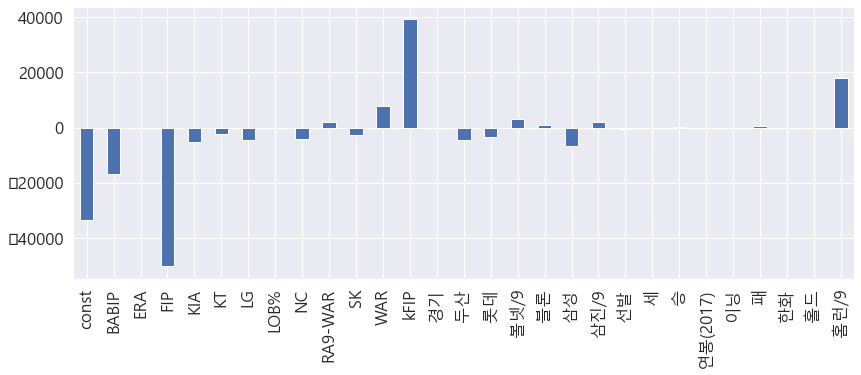

In [34]:
mpl.rc('font', family='Malgun Gothic')
plt.figure(figsize = (14,5))
ax = coefs_series.plot(kind = 'bar')
ax.set_xticklabels(x_labels)
plt.show()

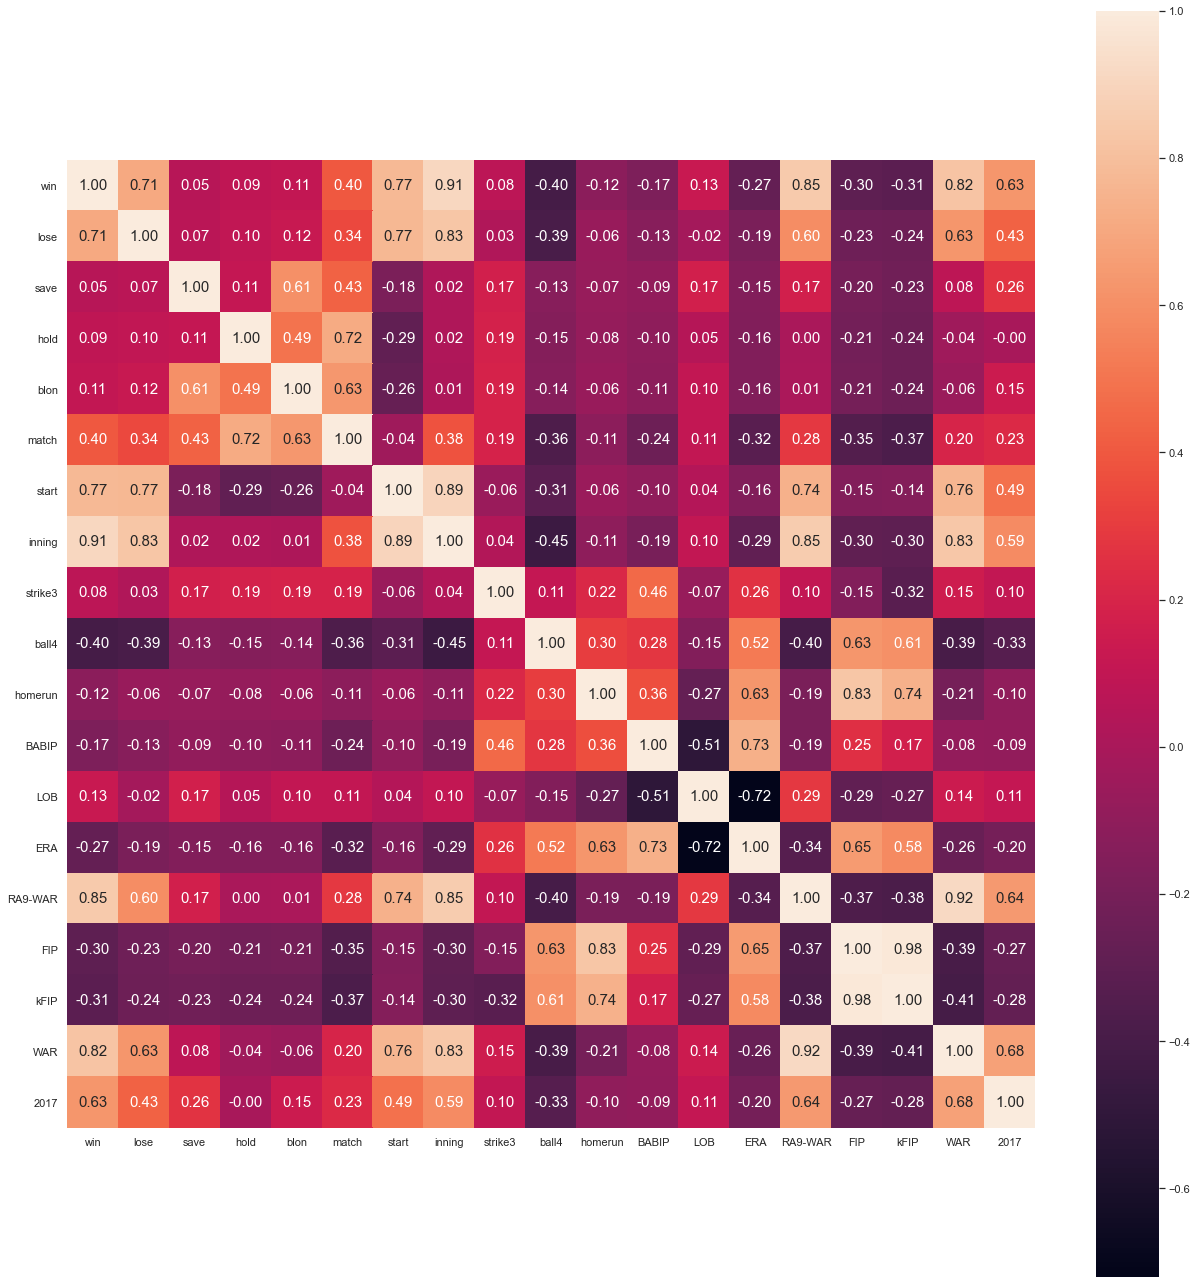

In [41]:
## 변수들간의 상관관계 분석 
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
sns.set(font_scale=1.0)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

In [23]:
## 다중공선성 확인, VIF > 10~15 인 경우 문제로 판단 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,566.2,KIA
4,719.8,KT
5,684.2,LG
6,4.3,LOB%
7,499.5,NC
8,13.6,RA9-WAR
9,682.3,SK


In [24]:
## 모델 재구성 : 다중공선성 높은 변수 제거, 회귀계수가 유의미한 것만 선택 

X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653888631


In [25]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347694
13141.86606359952


In [26]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.8,FIP
1,2.1,WAR
2,3.9,볼넷/9
3,2.4,삼진/9
4,2.5,연봉(2017)


In [27]:
## Fianal : 모델 예측값과 실제값 비교

# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [39]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv('data/picher_stats_2017.csv')
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
#result_df = result_df.iloc[:10, :]

print(result_df.shape)
result_df.head(10)

(128, 5)


,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148695,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot:ylabel='선수명'>

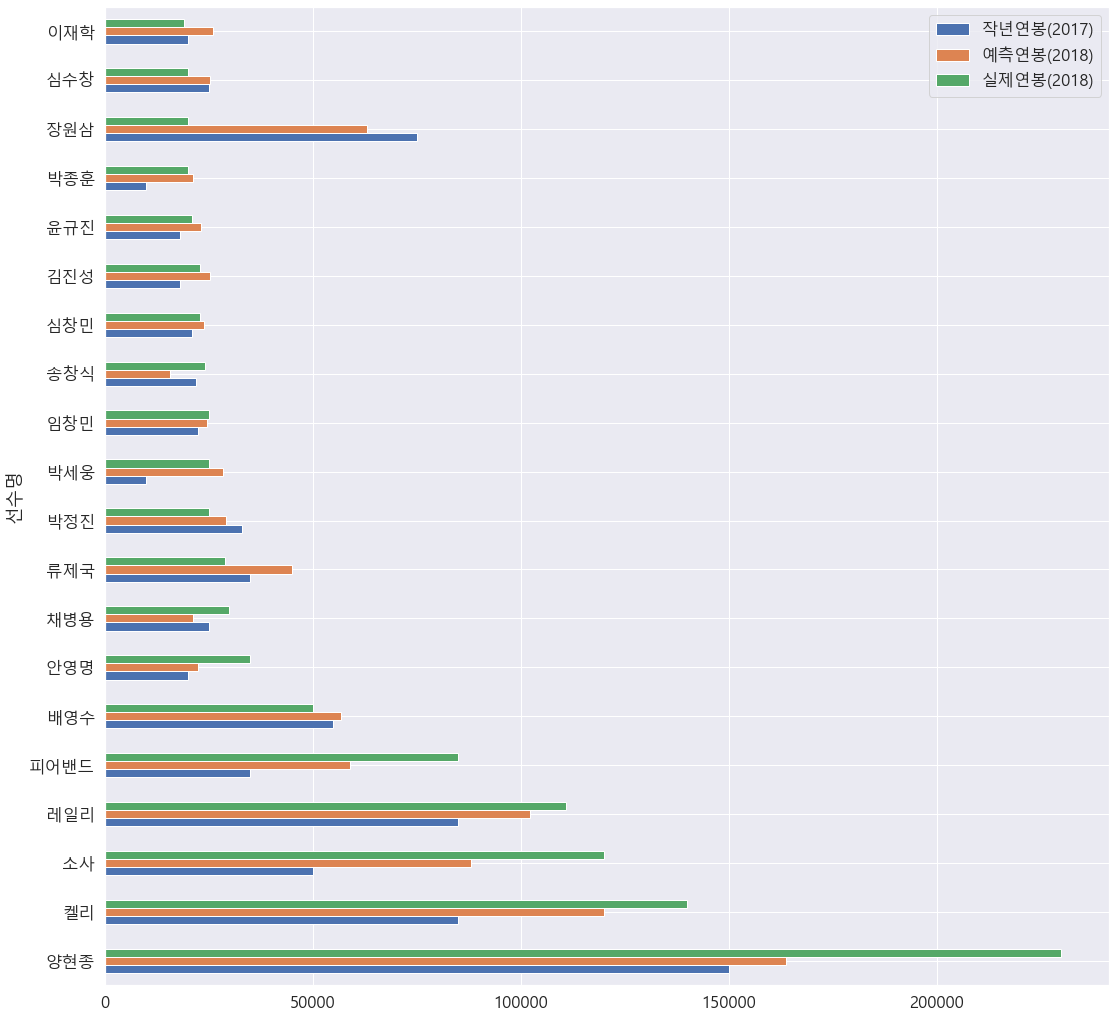

In [40]:
mpl.rc('font', family='Malgun Gothic')
result_df[:20].plot(x = '선수명', y = ['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind = 'barh')